In [1]:
%pylab inline
plt.style.use('bmh')
plt.rcParams['figure.figsize'] = [15, 8]
from mpl_toolkits.mplot3d import Axes3D


Populating the interactive namespace from numpy and matplotlib


In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## Euler's method

In [3]:
def eulers(h, f, domain):
    x0 = domain[0][0]
    y0 = domain[0][1]
    x_end = domain[1][0]
    y_end = domain[1][1]
    
    pts = [(x0,y0)]
    
    x = x0
    y = y0
    
    while x <= x_end:
        
        dxdy = f(x,y)
        if f(x,y) is None:
            break
    
        x_next = x + h
        y_next = y + h*dxdy
        
        pts.append((x_next,y_next))
        
        x = pts[-1][0]
        y = pts[-1][1]
    
    return pts

#### Helper functions

In [6]:
def get_sols(sol, h, steps, domain):
    x0 = domain[0][0]
    y0 = sol(x0)
    x_end = domain[1][0]
    
    pts = [(x0,y0)]
    
    x = x0
    y = y0
    
    while len(pts) <= steps:
        curr_sol = sol(x)
        if curr_sol is not None:
            pts.append((x,y))
            x = x + h
            y = curr_sol
        else:
            break
    return pts
        
def sol1(x):
    y = sin((x**2)/2) + 4
    return y

def dydx_1(x,y):
    if not (isnan(x*sqrt(1-(y-4)**2))):
        return x*sqrt(1-(y-4)**2)
    else:
        return None

def sol2(x):
    if not (isnan(0.1*sqrt(1-2*x))):
        return 1/(sqrt(1-2*x))
    else:
        return None

def dydx_2(x,y):
    return y**3

<ipython-input-6-ba6e4cb79f33>:26: RuntimeWarning: invalid value encountered in sqrt
  if not (isnan(x*sqrt(1-(y-4)**2))):


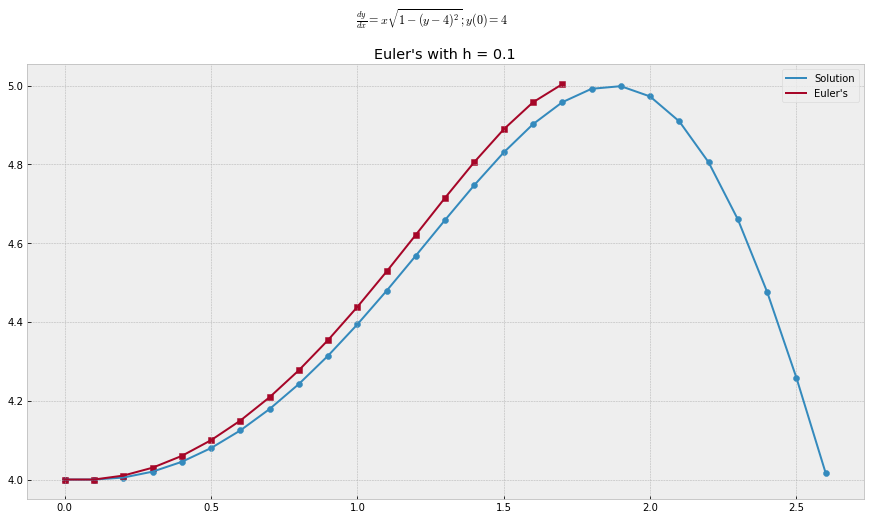

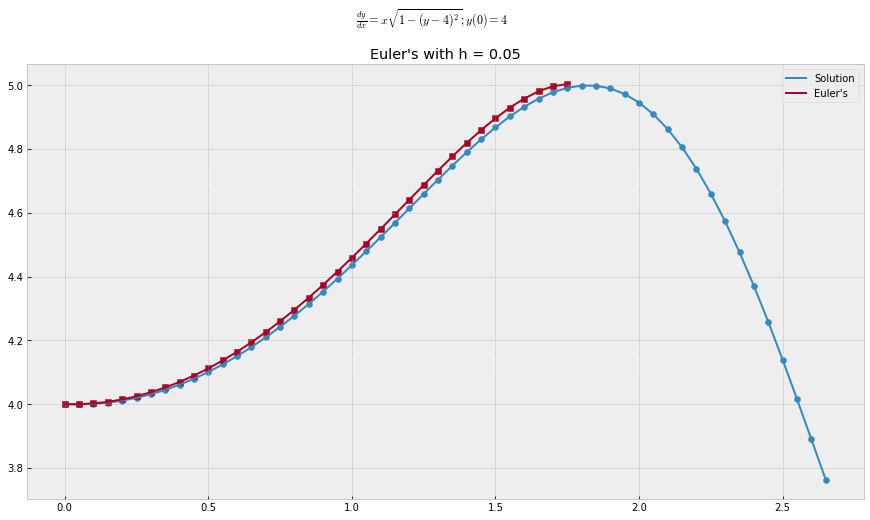

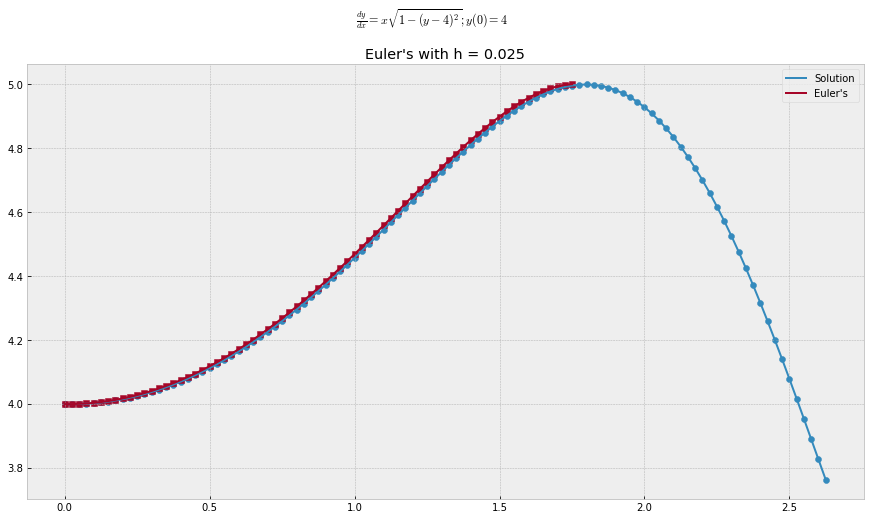

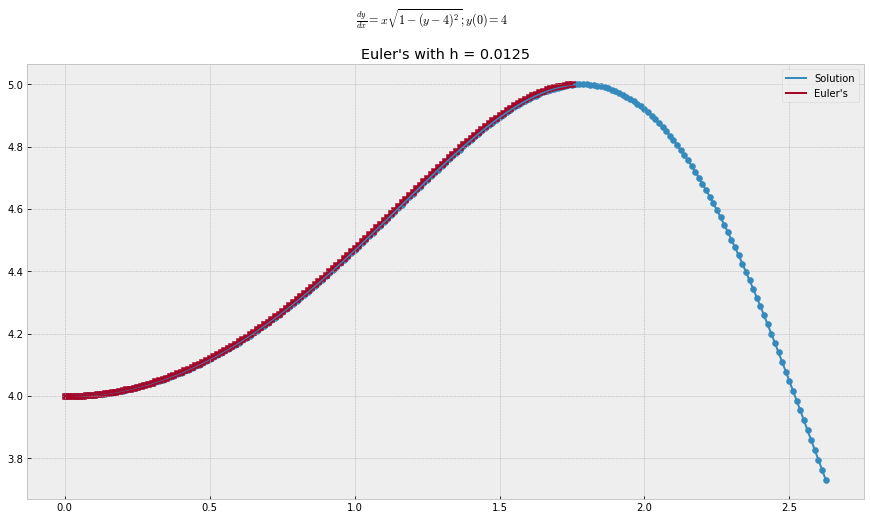

In [8]:
hs = [0.1,0.05,0.025,0.0125]

def test_a():
    for k in range(len(hs)):
        h = hs[k]
        domain = [(0,4),(100,100)]

        pts1 = eulers(h,dydx_1,domain)
        xs1 = [p[0] for p in pts1]
        ys1 = [p[1] for p in pts1]

        sols1 = get_sols(sol1, h, int(len(pts1)*1.5), domain)

        sols_x1 = [p[0] for p in sols1]
        sols_y1 = [p[1] for p in sols1]

        figure(k)
        plt.suptitle(r'$\frac{dy}{dx} = x\sqrt{1 - (y-4)^{2}} ;y(0) = 4$')
        plt.title("Euler's with h = {}".format(h))

        scatter(sols_x1,sols_y1)
        plot(sols_x1,sols_y1, label='Solution')

        scatter(xs1,ys1,marker='s')
        plot(xs1,ys1, label='Euler\'s')

        plt.legend()
        #plt.grid()
test_a()